In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv('log_df_o.csv', index_col=0)
df.columns

Index(['International Reputation', 'log_W', 'log_V', 'Club_V_0', 'Club_V_1',
       'Club_V_2', 'Club_V_3', 'Position_Class_0', 'Position_Class_1',
       'Position_Class_2', 'Position_Class_3', 'Age_C_1', 'Age_C_10',
       'Age_C_11', 'Age_C_2', 'Age_C_3', 'Age_C_4', 'Age_C_5', 'Age_C_6',
       'Age_C_7', 'Age_C_8', 'Age_C_9', 'Over_C_1', 'Over_C_10', 'Over_C_11',
       'Over_C_12', 'Over_C_13', 'Over_C_14', 'Over_C_15', 'Over_C_16',
       'Over_C_17', 'Over_C_18', 'Over_C_2', 'Over_C_3', 'Over_C_4',
       'Over_C_5', 'Over_C_6', 'Over_C_7', 'Over_C_8', 'Over_C_9',
       'Special_C_0', 'Special_C_1', 'Loaned_0', 'Loaned_1'],
      dtype='object')

In [ ]:
변수 : Club_V,Position_Class,Value,Wage,International Reputation,Age_C,Over_C,Special_C,Loaned
종속 변수 로그!, Value도 로그
원핫 인코딩 : Age_C,Over_C,Special_C,Loaned,Club_V,Position_Class

In [20]:
X= df.drop(['log_W'],axis = 1)
y= df['log_W']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=156)
# 단순 회귀 분석 모형 생성 및 평가
lr = LinearRegression()
lr.fit(X_train, y_train)
pred= lr.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred) # r_square = lr.score(X_test, y_test)도 같은 값

print('MSLE: {0:.3f}, RMSLE: {1:.3f}, r2 score: {2:.3f}'.format(mse, rmse,r2))

MSLE: 0.369, RMSLE: 0.607, r2 score: 0.761


In [6]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [7]:
params = {'alpha':[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,12,15]}

lr = LinearRegression()
rd = Ridge()
ls = Lasso()

models = [rd,ls]
for model in models:
    grid = GridSearchCV(model, param_grid = params, cv=5, scoring = 'neg_mean_squared_error')
    grid.fit(X,y)
    rmse = np.sqrt(-1*grid.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,rmse, grid.best_params_))

Ridge 5 CV 시 최적 평균 RMSE 값: 0.7092026176417249, 최적 alpha:{'alpha': 0.001}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.7185982575526765, 최적 alpha:{'alpha': 0.001}


In [10]:
lr = LinearRegression()
rd = Ridge(alpha=0.001)
ls = Lasso(alpha = 0.001)

models = [lr,rd,ls]
for model in models:
    print(str(model).split('(')[0], np.mean(-1* cross_val_score(model, X,y,scoring = 'neg_mean_squared_error', cv=5)))

LinearRegression 0.5029683126933702
Ridge 0.5029683528698746
Lasso 0.5163834557577427


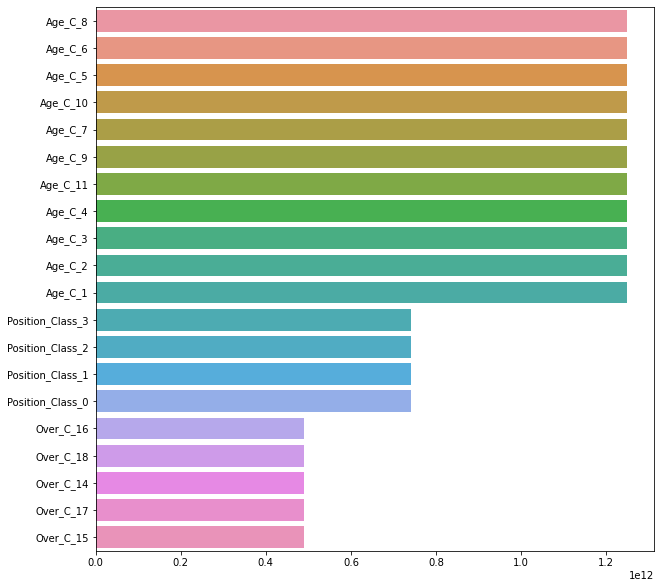

In [21]:
plt.figure(figsize=(10,10))
coef = pd.Series(lr.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y = coef_sort.index)

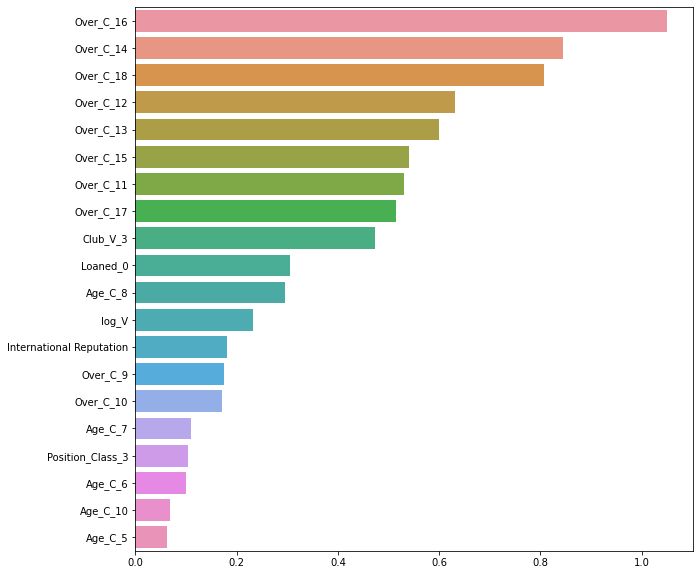

In [22]:
rd = Ridge(0.1)
rd.fit(X_train, y_train)
plt.figure(figsize=(10,10))
coef = pd.Series(rd.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y = coef_sort.index)

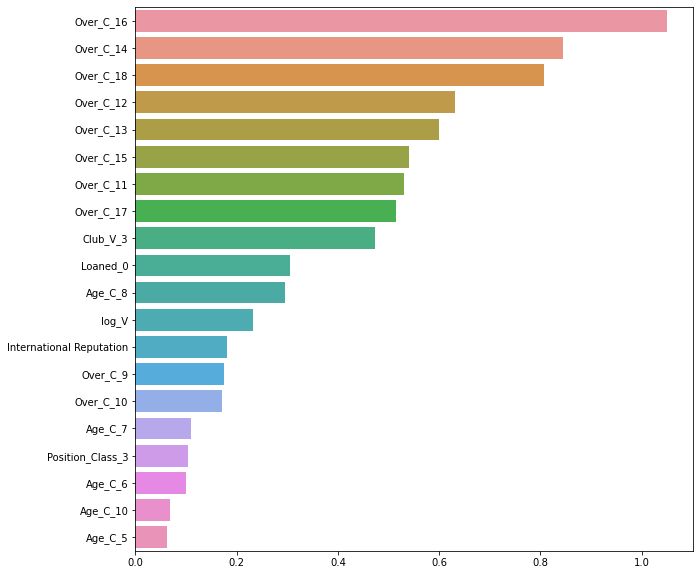

In [27]:
ls = Lasso(0.001)
ls.fit(X_train, y_train)
plt.figure(figsize=(10,10))
coef = pd.Series(rd.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y = coef_sort.index)

In [23]:
def predict(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,pred)
    print(model.__class__.__name__, 'RMSLE: {0:.4f}, R2 score: {1:.4f}'.format(rmse,r2))
    
for model in models:
    predict(model)

XGBRegressor RMSLE: 0.5989, R2 score: 0.7677
LGBMRegressor RMSLE: 0.5891, R2 score: 0.7752


In [13]:
# 회귀 트리
def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSLE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                                              np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [24]:
params = {'n_estimators':[800,1000, 1200]}

# xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
#                        colsample_bytree=0.5, subsample=0.8)
# lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
#                          subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

In [25]:
# best estimator 사용
best_xgb = get_best_params(xgb_reg, params)
best_lgbm = get_best_params(lgbm_reg, params)
models = [best_xgb,best_lgbm]
for model in models:
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test,pred)
    print(model.__class__.__name__, 'RMSLE: {0:.4f}, R2 score: {1:.4f}'.format(rmse,r2))

XGBRegressor 5 CV 시 최적 평균 RMSLE 값: 0.6301, 최적 alpha:{'n_estimators': 800}
LGBMRegressor 5 CV 시 최적 평균 RMSLE 값: 0.6034, 최적 alpha:{'n_estimators': 1200}
XGBRegressor RMSLE: 0.6072, R2 score: 0.7677
LGBMRegressor RMSLE: 0.6072, R2 score: 0.7752


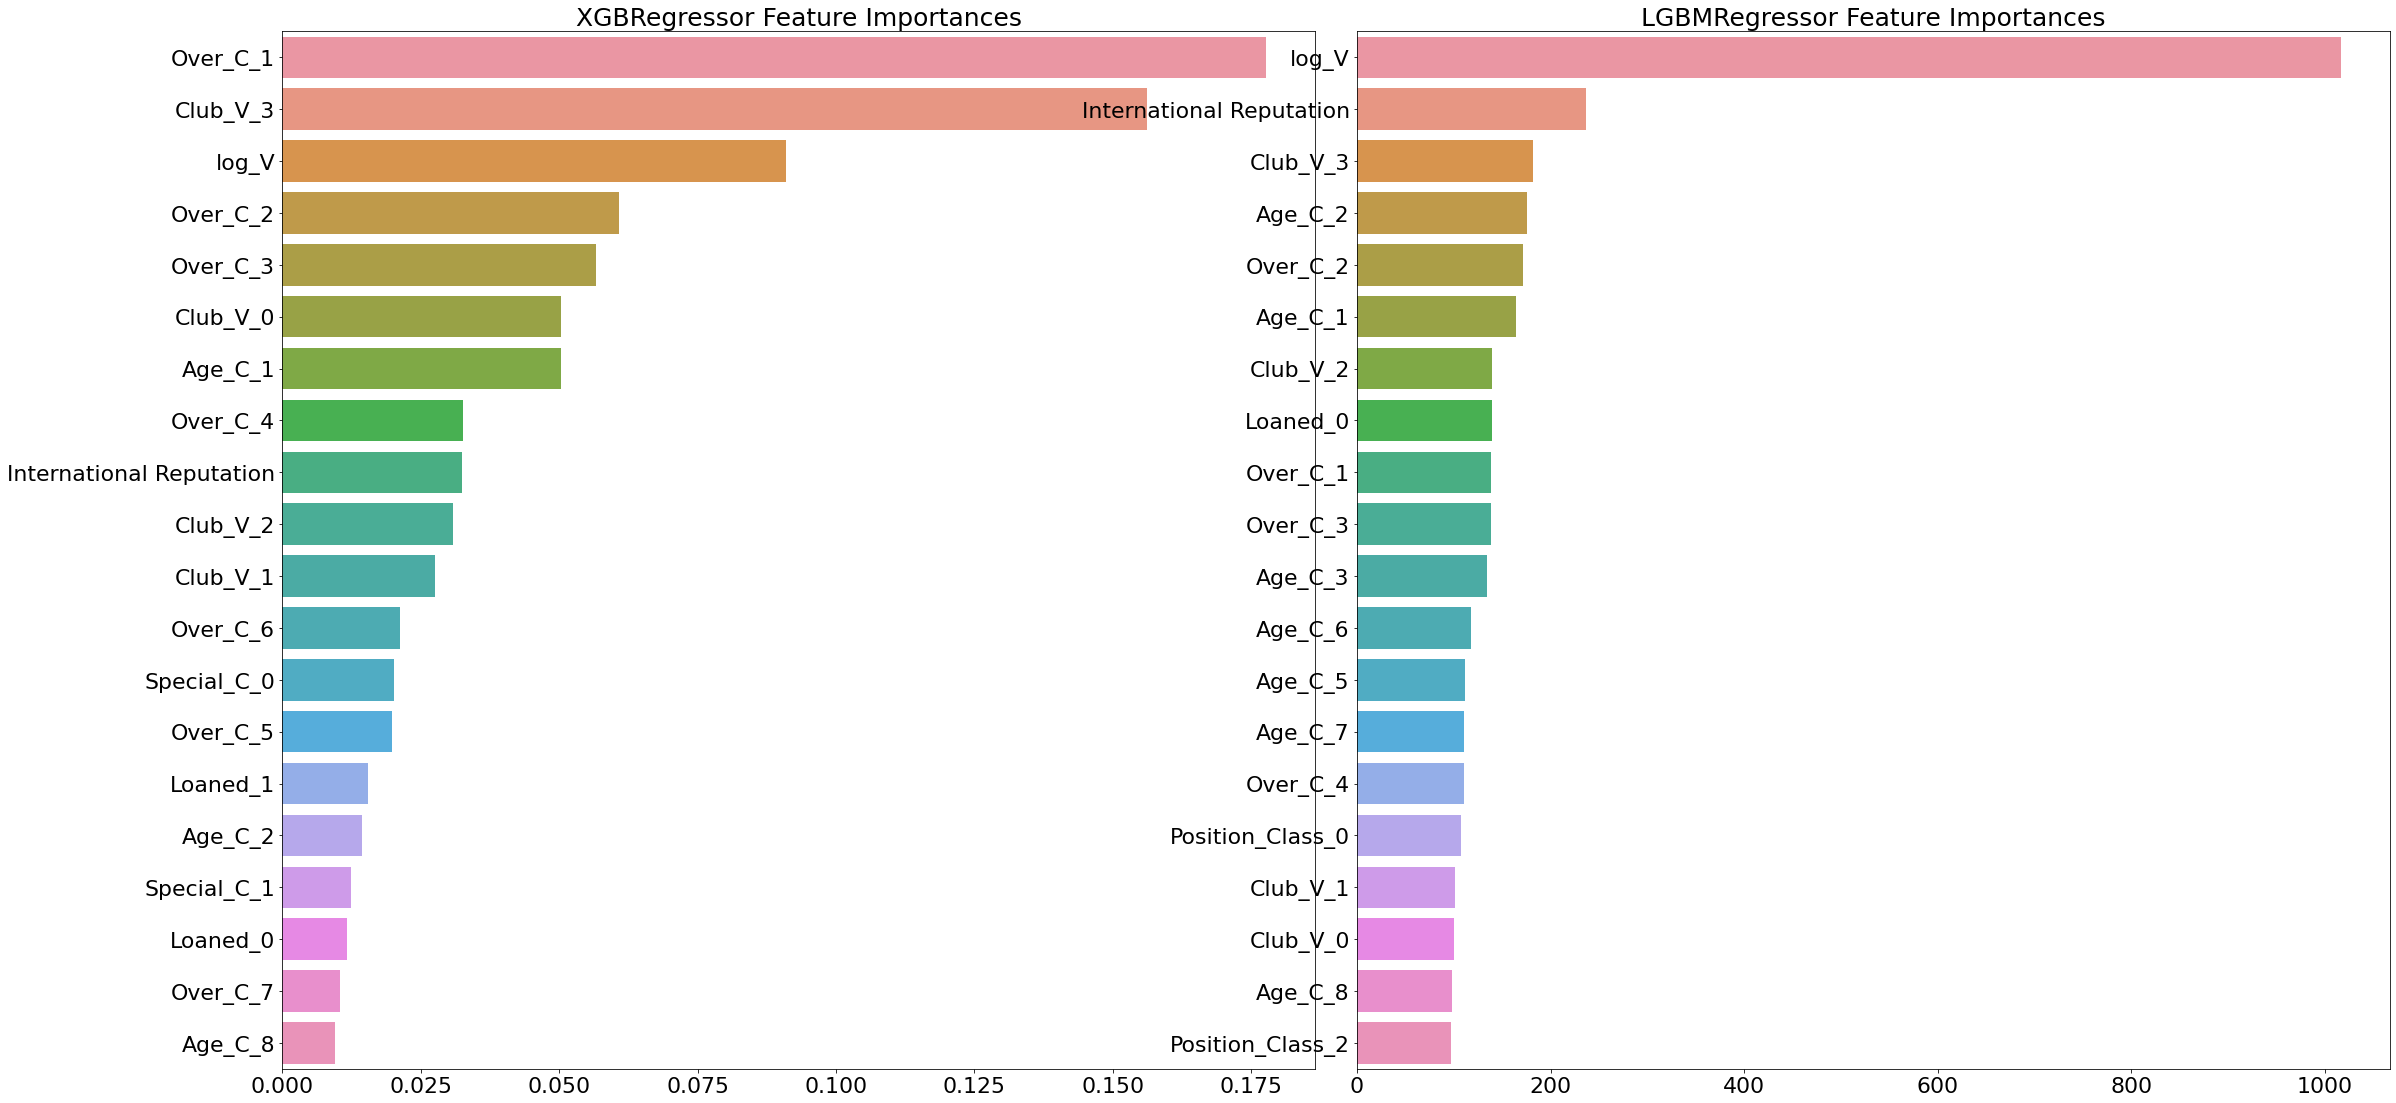

In [39]:
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    fig, axs = plt.subplots(figsize=(30,15),nrows=1, ncols=2)
    fig.tight_layout() 
    for i_num, model in enumerate(models):
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])
   
models = [best_xgb, best_lgbm]

visualize_ftr_importances(models)